In [49]:
%pip install pandas scikit-learn matplotlib numpy seaborn xgboost

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.3/200.3 MB 3.9 MB/s eta 0:00:00m eta 0:00:010:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd 

In [22]:
df = pd.read_csv("./TCS.NS.csv",parse_dates=True, index_col="Date")
# df.set_index("DATE")
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-05-30,3297.000000,3386.600098,3286.350098,3375.250000,3291.009277,2094624
2022-05-31,3354.149902,3383.399902,3325.000000,3364.350098,3280.381592,4840965
2022-06-01,3388.000000,3388.000000,3340.050049,3355.199951,3271.459717,1493835
2022-06-02,3355.000000,3432.000000,3346.300049,3423.000000,3337.567627,2657939
2022-06-03,3459.399902,3477.300049,3431.199951,3440.149902,3354.289307,1913622


<Axes: xlabel='Date'>

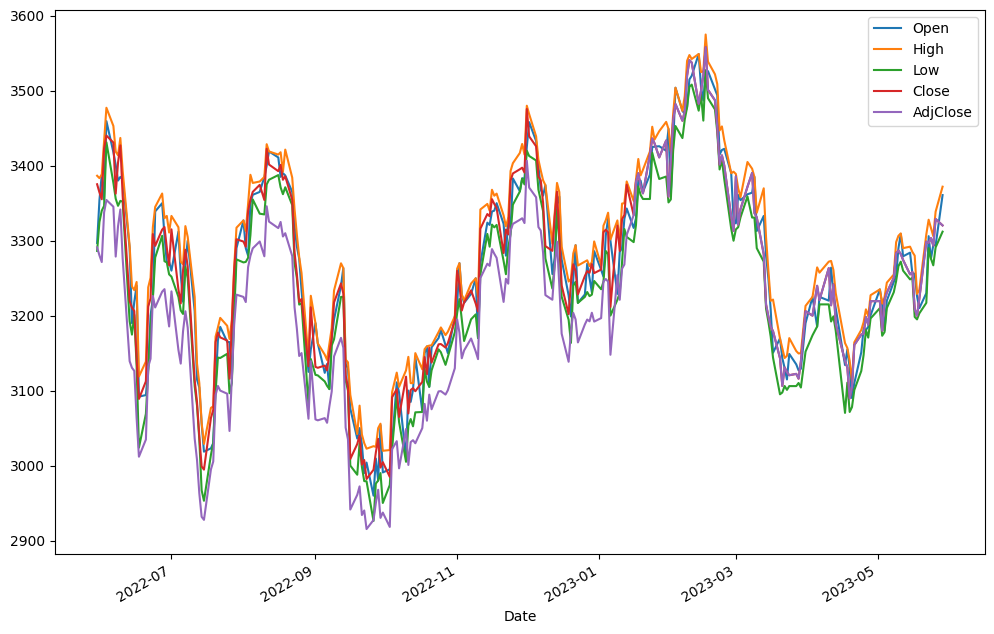

In [23]:
df.columns=["Open","High","Low","Close","AdjClose","Volume"]
# newdf = df.copy()
df = df.drop(["Volume"],axis=1)
df.plot(figsize=(12,8))

In [26]:
def make_data(df,name,n,col):
    for i in range(1,n+1):
        df[f"{name}_{i}"] = df[col].shift(+i)
    return df

make_data(df,"NewOpen",3,"Open")
make_data(df,"NewClose",3,"Close")
make_data(df,"NewHigh",3,"High")
make_data(df,"NewLow",3,"Low")
df.head()

,Open,High,Low,Close,AdjClose,NewOpen_1,NewOpen_2,NewOpen_3,NewClose_1,NewClose_2,NewClose_3,NewHigh_1,NewHigh_2,NewHigh_3,NewLow_1,NewLow_2,NewLow_3
Date,,,,,,,,,,,,,,,,,
2022-05-30,3297.000000,3386.600098,3286.350098,3375.250000,3291.009277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-31,3354.149902,3383.399902,3325.000000,3364.350098,3280.381592,3297.000000,NaN,NaN,3375.250000,NaN,NaN,3386.600098,NaN,NaN,3286.350098,NaN,NaN
2022-06-01,3388.000000,3388.000000,3340.050049,3355.199951,3271.459717,3354.149902,3297.000000,NaN,3364.350098,3375.250000,NaN,3383.399902,3386.600098,NaN,3325.000000,3286.350098,NaN
2022-06-02,3355.000000,3432.000000,3346.300049,3423.000000,3337.567627,3388.000000,3354.149902,3297.000000,3355.199951,3364.350098,3375.250000,3388.000000,3383.399902,3386.600098,3340.050049,3325.000000,3286.350098
2022-06-03,3459.399902,3477.300049,3431.199951,3440.149902,3354.289307,3355.000000,3388.000000,3354.149902,3423.000000,3355.199951,3364.350098,3432.000000,3388.000000,3383.399902,3346.300049,3340.050049,3325.000000


In [27]:
df = df.dropna()
df.head()

,Open,High,Low,Close,AdjClose,NewOpen_1,NewOpen_2,NewOpen_3,NewClose_1,NewClose_2,NewClose_3,NewHigh_1,NewHigh_2,NewHigh_3,NewLow_1,NewLow_2,NewLow_3
Date,,,,,,,,,,,,,,,,,
2022-06-02,3355.000000,3432.000000,3346.300049,3423.000000,3337.567627,3388.000000,3354.149902,3297.000000,3355.199951,3364.350098,3375.250000,3388.000000,3383.399902,3386.600098,3340.050049,3325.000000,3286.350098
2022-06-03,3459.399902,3477.300049,3431.199951,3440.149902,3354.289307,3355.000000,3388.000000,3354.149902,3423.000000,3355.199951,3364.350098,3432.000000,3388.000000,3383.399902,3346.300049,3340.050049,3325.000000
2022-06-06,3418.000000,3453.000000,3377.149902,3430.949951,3345.319336,3459.399902,3355.000000,3388.000000,3440.149902,3423.000000,3355.199951,3477.300049,3432.000000,3388.000000,3431.199951,3346.300049,3340.050049
2022-06-07,3401.050049,3418.850098,3356.000000,3362.699951,3278.772705,3418.000000,3459.399902,3355.000000,3430.949951,3440.149902,3423.000000,3453.000000,3477.300049,3432.000000,3377.149902,3431.199951,3346.300049
2022-06-08,3380.149902,3413.949951,3346.500000,3404.149902,3319.188232,3401.050049,3418.000000,3459.399902,3362.699951,3430.949951,3440.149902,3418.850098,3453.000000,3477.300049,3356.000000,3377.149902,3431.199951


In [28]:
import numpy as np

def make_data(df, l):
    final_x = []
    for i in l:
        final_x.append(np.array(df[i]).reshape(-1,1))
        
    return np.concatenate(final_x,axis=1)

final_x = make_data(df,['Open','NewOpen_1','NewOpen_2','NewOpen_3','NewClose_1','NewClose_2','NewClose_3','NewHigh_1','NewHigh_2','NewHigh_3','NewLow_1','NewLow_2','NewLow_3'])
y = np.array(df["Close"]).reshape(-1,1)
# x1,x2,x3,x4,x5,x6,y=df['Open'],df['High'],df['Low'],df['NewOpen_1'],df['NewClose_1'],df['NewClose_2'],df['Close']
# x1,x2,x3,x4,x5,x6,y=np.array(x1),np.array(x2),np.array(x3),np.array(x4),np.array(x5),np.array(x6),np.array(y)
# x1,x2,x3,x4,x5,x6,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),x4.reshape(-1,1),x5.reshape(-1,1),x6.reshape(-1,1),y.reshape(-1,1)
# final_x=np.concatenate((x1,x2,x3,x4,x5,x6),axis=1)

In [29]:
drop = -40
X_train,X_test,y_train,y_test=final_x[:drop],final_x[drop:],y[:drop],y[drop:]

In [30]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()

In [31]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=1000,max_features=5, random_state=1,verbose=True)

In [32]:
model.fit(X_train,y_train)
lin_model.fit(X_train,y_train)

/tmp/ipykernel_6324/1977262272.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    3.7s finished


LinearRegression()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished


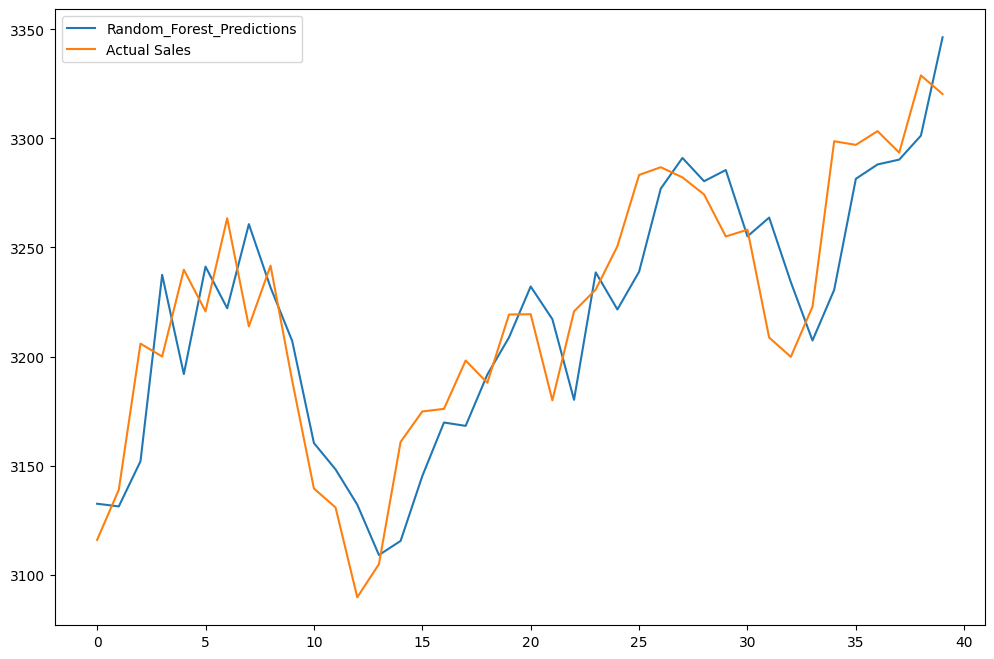

In [33]:
pred=model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred,label='Random_Forest_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

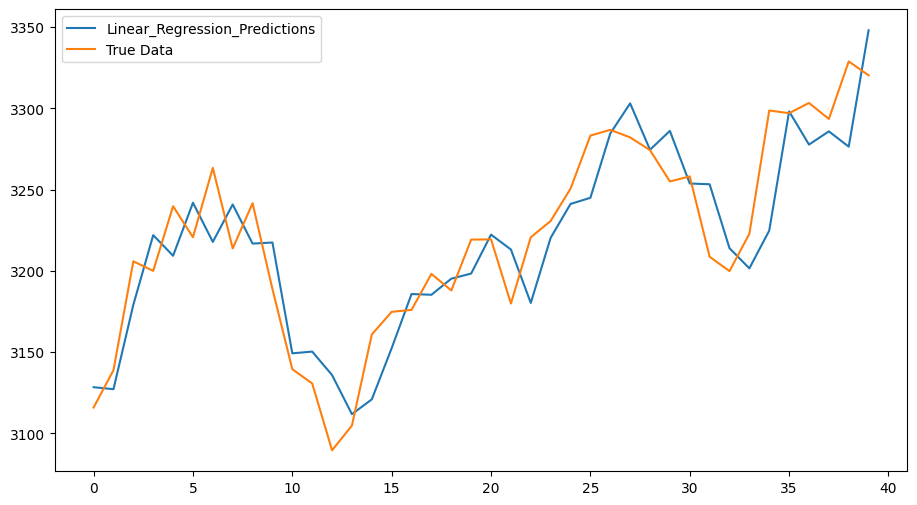

In [34]:

lin_pred=lin_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(lin_pred,label='Linear_Regression_Predictions')
plt.plot(y_test,label='True Data')
plt.legend(loc="upper left")
plt.show()

In [ ]:
%pip install seaborn xgboost 

In [35]:
import seaborn as sns
import xgboost as xgb

from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [36]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)

In [37]:
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[10:06:10] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:3234.54336	validation_1-rmse:3188.19692
[100]	validation_0-rmse:1195.64682	validation_1-rmse:1155.49120
[200]	validation_0-rmse:445.44121	validation_1-rmse:427.48483
[300]	validation_0-rmse:169.19664	validation_1-rmse:160.62233
[400]	validation_0-rmse:69.56352	validation_1-rmse:68.35744
[500]	validation_0-rmse:37.10623	validation_1-rmse:39.88961
[600]	validation_0-rmse:27.81253	validation_1-rmse:33.60570
[700]	validation_0-rmse:24.65555	validation_1-rmse:32.27406
[800]	validation_0-rmse:23.09994	validation_1-rmse:31.99496
[828]	validation_0-rmse:22.72277	validation_1-rmse:32.01889


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

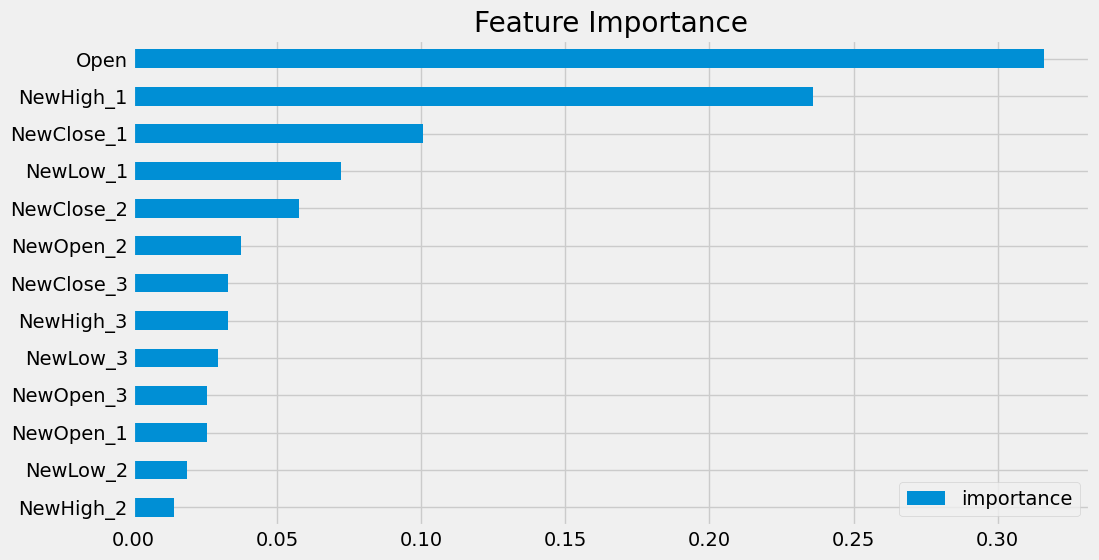

In [38]:
index = ['Open','NewOpen_1','NewOpen_2','NewOpen_3','NewClose_1','NewClose_2','NewClose_3','NewHigh_1','NewHigh_2','NewHigh_3','NewLow_1','NewLow_2','NewLow_3']
fi = pd.DataFrame(data=reg.feature_importances_,
             columns=['importance'],index=index)
fi.sort_values('importance').plot.barh(title='Feature Importance')

plt.show()

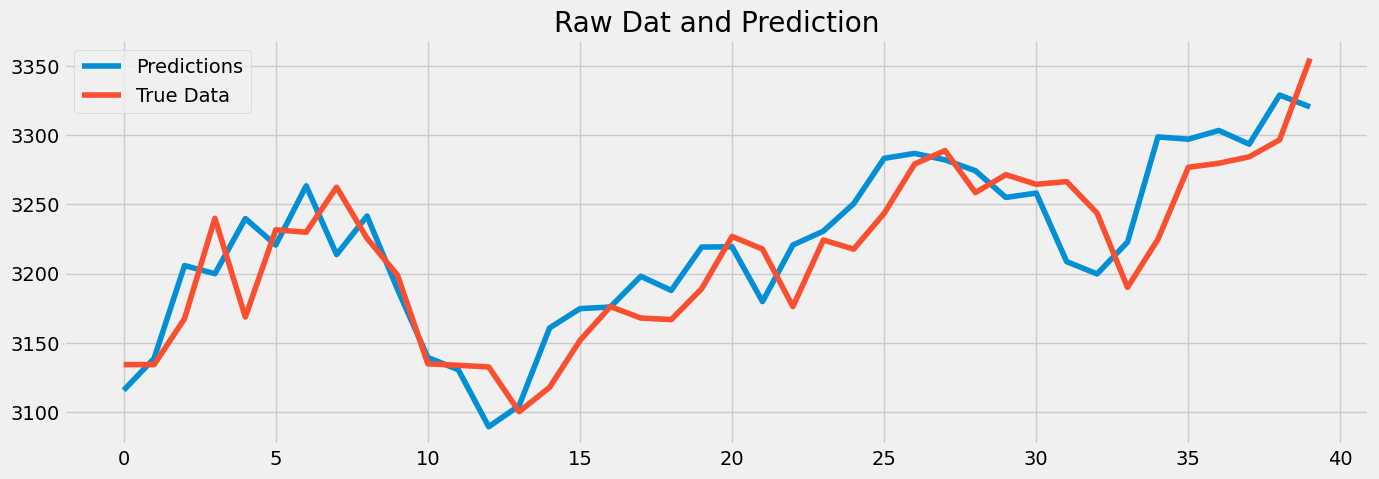

In [39]:
test = pd.DataFrame(y_test,columns=["sales"])
test['prediction'] = reg.predict(X_test)
# print(test)
# df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)
# print(df)
ax = test["sales"].plot(figsize=(15, 5))
test['prediction'].plot(ax=ax, style='-')
plt.legend(['Predictions','True Data'])
ax.set_title('Raw Dat and Prediction')
plt.show()

In [55]:
X_test[:-10]

array([[3235.      , 3235.      , 3210.      , 3200.399902, 3219.25    ,
        3187.949951],
       [3216.      , 3216.      , 3173.149902, 3235.      , 3219.399902,
        3219.25    ],
       [3180.149902, 3224.449951, 3178.      , 3216.      , 3179.899902,
        3219.399902],
       [3220.      , 3244.      , 3210.050049, 3180.149902, 3220.699951,
        3179.899902],
       [3245.      , 3254.850098, 3231.300049, 3220.      , 3230.699951,
        3220.699951],
       [3252.600098, 3298.      , 3246.      , 3245.      , 3250.600098,
        3230.699951],
       [3290.      , 3306.5     , 3266.050049, 3252.600098, 3283.25    ,
        3250.600098],
       [3309.      , 3309.699951, 3272.      , 3290.      , 3286.800049,
        3283.25    ],
       [3279.149902, 3290.      , 3260.      , 3309.      , 3282.149902,
        3286.800049],
       [3284.      , 3292.      , 3248.350098, 3279.149902, 3274.300049,
        3282.149902]])

In [2]:
%pip install python-dotenv

Defaulting to user installation because normal site-packages is not writeable
  Using cached python_dotenv-1.0.0-py3-none-any.whl (19 kB)
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [21]:
# from dotenv import dotenv_values

# config = dotenv_values(".env")

In [3]:
import requests
import datetime
import json
import urllib
import pandas as pd
import concurrent
from concurrent.futures import ALL_COMPLETED

"""### Set Environment Variables """

HISTORICAL_DATA_URL = 'https://www.nseindia.com/api/historical/cm/equity?series=[%22EQ%22]&'
BASE_URL = 'https://www.nseindia.com/'

"""### Define Helper Functions """

def get_adjusted_headers():
    return {
        'Host': 'www.nseindia.com',
        'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:85.0) Gecko/20100101 Firefox/85.0',
        'Accept': '*/*',
        'Accept-Language': 'en-US,en;q=0.5',
        'Accept-Encoding': 'gzip, deflate, br',
        'X-Requested-With': 'XMLHttpRequest',
        'DNT': '1',
        'Connection': 'keep-alive',
    }

def fetch_cookies():
    response = requests.get(BASE_URL, timeout=30, headers=get_adjusted_headers())
    if response.status_code != requests.codes.ok:
        # logging.error("Fetched url: %s with status code: %s and response from server: %s" % (
        #     BASE_URL, response.status_code, response.content))
        raise ValueError("Please try again in a minute.")
    return response.cookies.get_dict()

def fetch_url(url, cookies):
    """
        This is the function call made by each thread. A get request is made for given start and end date, response is
        parsed and dataframe is returned
    """
    response = requests.get(url, timeout=30, headers=get_adjusted_headers(), cookies=cookies)
    if response.status_code == requests.codes.ok:
        json_response = json.loads(response.content)
        return pd.DataFrame.from_dict(json_response['data'])
    else:
        raise ValueError("Please try again in a minute.")

def scrape_data(start_date, end_date, name=None, input_type='stock'):
    """
    Called by stocks and indices to scrape data.
    Create threads for different requests, parses data, combines them and returns dataframe
    Args:
        start_date (datetime.datetime): start date
        end_date (datetime.datetime): end date
        input_type (str): Either 'stock' or 'index'
        name (str, optional): stock symbol or index name. Defaults to None.
    Returns:
        Pandas DataFrame: df containing data for stocksymbol for provided date range
    """
    cookies = fetch_cookies()

    start_date = datetime.datetime.strptime(start_date, "%d-%m-%Y")
    end_date = datetime.datetime.strptime(end_date, "%d-%m-%Y")

    threads, url_list = [], []

    # set the window size to one year
    window_size = datetime.timedelta(days=50)

    current_window_start = start_date
    while current_window_start < end_date:
        current_window_end = current_window_start + window_size

        # check if the current window extends beyond the end_date
        if current_window_end > end_date:
            current_window_end = end_date

        st = current_window_start.strftime('%d-%m-%Y')
        et = current_window_end.strftime('%d-%m-%Y')
        # print(st,et)
        if input_type == 'stock':
            params = {'symbol': name,
                        'from': st,
                        'to': et}
            url = HISTORICAL_DATA_URL + urllib.parse.urlencode(params)
            url_list.append(url)

        # move the window start to the next day after the current window end
        current_window_start = current_window_end + datetime.timedelta(days=1)

    result = pd.DataFrame()
    with concurrent.futures.ThreadPoolExecutor(max_workers=5) as executor:
        future_to_url = {executor.submit(fetch_url, url, cookies): url for url in url_list}
        concurrent.futures.wait(future_to_url, return_when=ALL_COMPLETED)
        for future in concurrent.futures.as_completed(future_to_url):
            url = future_to_url[future]
            try:
                df = future.result()
                result = pd.concat([result, df])
            except Exception as exc:
                # logging.error('%r generated an exception: %s. Please try again later.' % (url, exc))
                raise exc
    return format_dataframe_result(result, start_date, end_date)


def format_dataframe_result(result, start_date, end_date):
    if result.empty:
        return f"No Data Found : for date range {start_date} to {end_date}"
    columns_required = ["CH_TIMESTAMP", "CH_SYMBOL", "CH_SERIES", "CH_TRADE_HIGH_PRICE",
                        "CH_TRADE_LOW_PRICE", "CH_OPENING_PRICE", "CH_CLOSING_PRICE", "CH_LAST_TRADED_PRICE",
                        "CH_PREVIOUS_CLS_PRICE", "CH_TOT_TRADED_QTY", "CH_TOT_TRADED_VAL", "CH_52WEEK_HIGH_PRICE",
                        "CH_52WEEK_LOW_PRICE"]
    result = result[columns_required]
    result = result.set_axis(
        ['Date', 'Symbol', 'Series', 'High Price', 'Low Price', 'Open Price', 'Close Price', 'Last Price',
         'Prev Close Price', 'Total Traded Quantity', 'Total Traded Value', '52 Week High Price',
         '52 Week Low Price'], axis=1)
    result['Date'] = pd.to_datetime(result['Date'])
    result = result.sort_values('Date', ascending=True)
    result.reset_index(drop=True, inplace=True)
    return result

"""### Scrape Directly to DataFrame """

df = scrape_data('30-05-2022','30-05-2023','TCS')
tcs = df.copy()
df.head()

,Date,Symbol,Series,High Price,Low Price,Open Price,Close Price,Last Price,Prev Close Price,Total Traded Quantity,Total Traded Value,52 Week High Price,52 Week Low Price
0,2022-05-30,TCS,EQ,3386.6,3286.35,3297.00,3375.25,3380.40,3261.30,2094624,7.031980e+09,4043.0,3115.0
1,2022-05-31,TCS,EQ,3383.4,3325.00,3354.15,3364.35,3365.00,3375.25,4840965,1.627398e+10,4043.0,3115.0
2,2022-06-01,TCS,EQ,3388.0,3340.05,3388.00,3355.20,3359.15,3364.35,1493835,5.021809e+09,4043.0,3115.0
3,2022-06-02,TCS,EQ,3432.0,3346.30,3355.00,3423.00,3425.00,3355.20,2657939,9.054132e+09,4043.0,3115.0
4,2022-06-03,TCS,EQ,3477.3,3431.20,3459.40,3440.15,3439.50,3423.00,1913622,6.624247e+09,4043.0,3115.0


In [66]:
df = df[['Date','High Price', 'Low Price', 'Open Price','Close Price']]
df.columns = ['Date','High', 'Low', 'Open','Close']
df.head()

,Date,High,Low,Open,Close
0,2022-05-30,3386.6,3286.35,3297.00,3375.25
1,2022-05-31,3383.4,3325.00,3354.15,3364.35
2,2022-06-01,3388.0,3340.05,3388.00,3355.20
3,2022-06-02,3432.0,3346.30,3355.00,3423.00
4,2022-06-03,3477.3,3431.20,3459.40,3440.15


In [67]:
def make_data(df,name,n,col):
    for i in range(1,n+1):
        df[f"{name}_{i}"] = df[col].shift(+i)
    return df

make_data(df,"NewOpen",3,"Open")
make_data(df,"NewClose",3,"Close")
make_data(df,"NewHigh",3,"High")
make_data(df,"NewLow",3,"Low")
df.head()

,Date,High,Low,Open,Close,NewOpen_1,NewOpen_2,NewOpen_3,NewClose_1,NewClose_2,NewClose_3,NewHigh_1,NewHigh_2,NewHigh_3,NewLow_1,NewLow_2,NewLow_3
0,2022-05-30,3386.6,3286.35,3297.00,3375.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-05-31,3383.4,3325.00,3354.15,3364.35,3297.00,NaN,NaN,3375.25,NaN,NaN,3386.6,NaN,NaN,3286.35,NaN,NaN
2,2022-06-01,3388.0,3340.05,3388.00,3355.20,3354.15,3297.00,NaN,3364.35,3375.25,NaN,3383.4,3386.6,NaN,3325.00,3286.35,NaN
3,2022-06-02,3432.0,3346.30,3355.00,3423.00,3388.00,3354.15,3297.00,3355.20,3364.35,3375.25,3388.0,3383.4,3386.6,3340.05,3325.00,3286.35
4,2022-06-03,3477.3,3431.20,3459.40,3440.15,3355.00,3388.00,3354.15,3423.00,3355.20,3364.35,3432.0,3388.0,3383.4,3346.30,3340.05,3325.00


In [69]:
df = df.dropna()
df.head()

,Date,High,Low,Open,Close,NewOpen_1,NewOpen_2,NewOpen_3,NewClose_1,NewClose_2,NewClose_3,NewHigh_1,NewHigh_2,NewHigh_3,NewLow_1,NewLow_2,NewLow_3
3,2022-06-02,3432.00,3346.30,3355.00,3423.00,3388.00,3354.15,3297.00,3355.20,3364.35,3375.25,3388.00,3383.4,3386.6,3340.05,3325.00,3286.35
4,2022-06-03,3477.30,3431.20,3459.40,3440.15,3355.00,3388.00,3354.15,3423.00,3355.20,3364.35,3432.00,3388.0,3383.4,3346.30,3340.05,3325.00
5,2022-06-06,3453.00,3377.15,3418.00,3430.95,3459.40,3355.00,3388.00,3440.15,3423.00,3355.20,3477.30,3432.0,3388.0,3431.20,3346.30,3340.05
6,2022-06-07,3418.85,3356.00,3401.05,3362.70,3418.00,3459.40,3355.00,3430.95,3440.15,3423.00,3453.00,3477.3,3432.0,3377.15,3431.20,3346.30
7,2022-06-08,3413.95,3346.50,3380.15,3404.15,3401.05,3418.00,3459.40,3362.70,3430.95,3440.15,3418.85,3453.0,3477.3,3356.00,3377.15,3431.20


In [70]:
import numpy as np

def join_data(df, l):
    final_x = []
    for i in l:
        final_x.append(np.array(df[i]).reshape(-1,1))
        
    return np.concatenate(final_x,axis=1)

final_x = join_data(df,['Open','NewOpen_1','NewOpen_2','NewOpen_3','NewClose_1','NewClose_2','NewClose_3','NewHigh_1','NewHigh_2','NewHigh_3','NewLow_1','NewLow_2','NewLow_3'])
y = np.array(df["Close"]).reshape(-1,1)

In [71]:
drop = -40
X_train,X_test,y_train,y_test=final_x[:drop],final_x[drop:],y[:drop],y[drop:]

In [72]:
import seaborn as sns
import xgboost as xgb

from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [73]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)

In [74]:
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[14:57:54] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:3234.54336	validation_1-rmse:3188.19692
[100]	validation_0-rmse:1195.64682	validation_1-rmse:1155.49120
[200]	validation_0-rmse:445.44121	validation_1-rmse:427.48483
[300]	validation_0-rmse:169.19664	validation_1-rmse:160.62233
[400]	validation_0-rmse:69.56352	validation_1-rmse:68.35744
[500]	validation_0-rmse:37.10623	validation_1-rmse:39.88961
[600]	validation_0-rmse:27.81253	validation_1-rmse:33.60570
[700]	validation_0-rmse:24.65555	validation_1-rmse:32.27406
[800]	validation_0-rmse:23.09994	validation_1-rmse:31.99496
[828]	validation_0-rmse:22.72277	validation_1-rmse:32.01889


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

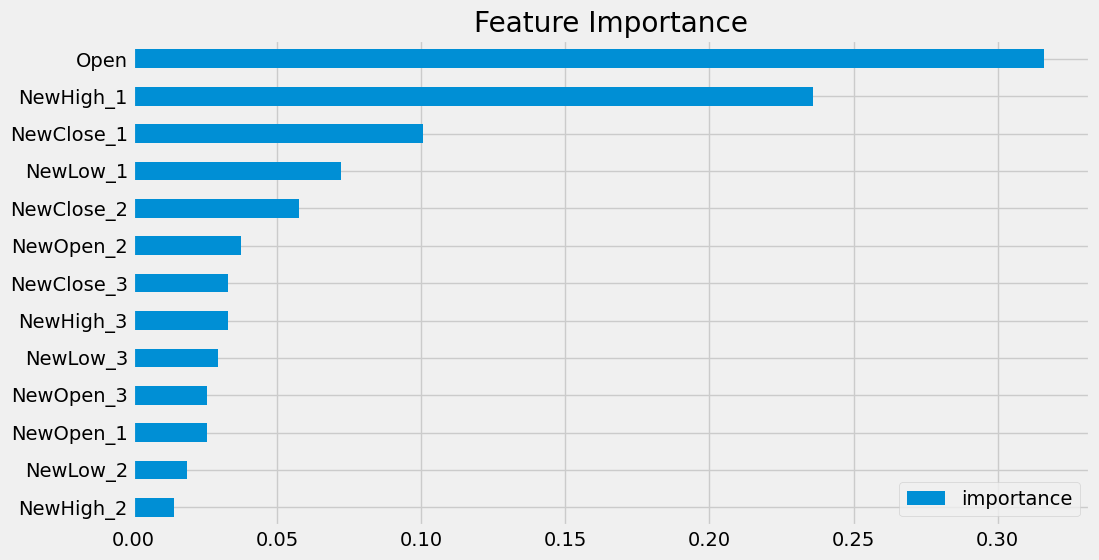

In [75]:
index = ['Open','NewOpen_1','NewOpen_2','NewOpen_3','NewClose_1','NewClose_2','NewClose_3','NewHigh_1','NewHigh_2','NewHigh_3','NewLow_1','NewLow_2','NewLow_3']
fi = pd.DataFrame(data=reg.feature_importances_,
             columns=['importance'],index=index)
fi.sort_values('importance').plot.barh(title='Feature Importance')

plt.show()

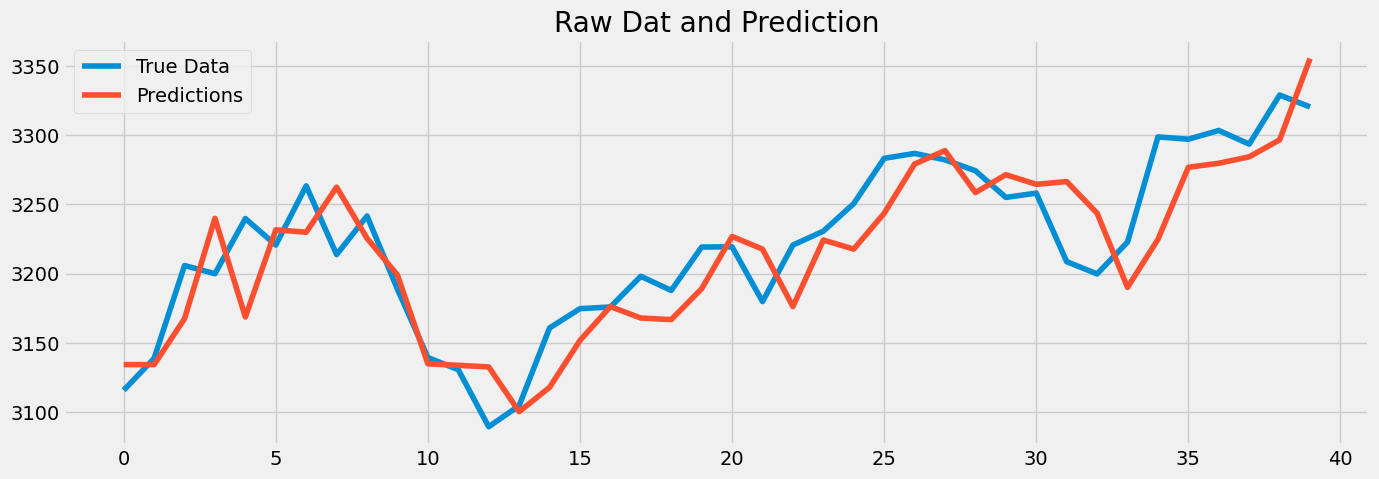

In [77]:
test = pd.DataFrame(y_test,columns=["Price"])
test['prediction'] = reg.predict(X_test)
# print(test)
# df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)
# print(df)
ax = test["Price"].plot(figsize=(15, 5))
test['prediction'].plot(ax=ax, style='-')
plt.legend(['True Data','Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

In [6]:
str(datetime.datetime.now())

'2023-05-31 08:19:40.279056'